<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **IA Projeto N1**

rogerio.oliveira@mackenzie.br

---

Link para o Github:
https://github.com/GustavoKozonoe/projeto-N1-Inteligencia-Artificial

# Classificação: Regressão Logística $\times$ Regressão Linear

Você aprendeu que a regressão linear é um modelo para a predição de valores ou quantidades contínuas, e que a regressão logística é um modelo para a predição de classes binárias. Entretanto, se considerarmos duas classes $0, 1$ como valores podemos empregar um modelo de regressão linear também para a classificação. **Neste projeto você vai escolher e empregar uma base de dados pública para comparar o uso da regressão linear e da regressão logística na classificação binária de dados**.











<img src="https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png" width=500, align="left">



* **Objetivo**: Empregar uma base de dados pública para comparar o uso da regressão linear e da regressão logística na classificação binária de dados. Discutir os resultados e comparar com a referências sobre o tema.

> * **Dados**. 

>> * **Base pública**. Indicando as referências *Kaggle* ou bases públicas de governo são ideais.
>> * **Compartilhe a base para que a execução do notebook** do seu projeto esteja disponível para qualquer um. Sugestão: carregue no GitHub em uma pasta pública. Não empregue o Google Drive pois seria necessário adicionar um atalho.
>> * **Min 1000 instâncias e 5 atributos preditores**.
>> * **Podem ser empregadas transformações nos dados para criação das classes**. Não é o recomendado, mas se você estiver seguro da transformação e justificar adequadamente pode empregar. A transformação deve constar do código do notebook.

* **Entrega**. Acesse aqui o [template](https://colab.research.google.com/github/Rogerio-mack/IA_2022_1S/blob/main/IA_Projeto_N1_template.ipynb)  da entrega. Todos esses itens devem ser produzidos a partir dos dados brutos com Python e o notebook deve ser 100% executável.

* **Data para Entrega** 

> 06.04

* **Trabalho em Grupo** 

> Mínimo 2 e máximo 5 alunos. 

* **Critério de Avaliação**

> N1 = .4 Atividade Avaliativa 1 + .4 Exercicios 1 + .2 Projeto

> Projeto =  ver critério no template.




In [ ]:
# Cássio Kineipe - 31929265
# Gustavo Kozonoe - 31906117
# Marcos Paulo - 31927416
# Rafael Lua - 31948571

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  
df = pd.read_csv("train-new.csv")
df = df.dropna()
df.airbag = df.airbag.replace('airbag', 1).replace('none', 0)
df.seatbelt = df.seatbelt.replace('belted', 1).replace('none', 0)
df.sex = df.sex.replace('f', 1).replace('m', 0)
df.deploy = df.deploy.replace('driver', 1).replace('pass', 0)
df.occRole = df.occRole.replace('driver', 1).replace('pass', 0)
df.dead = df.dead.replace('dead', 1).replace('alive', 0)
df.head()


,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,1,1,1,1,1,48,2002,1997,deploy,1,1,45:150:1,3
1,25-39,154.960,0,0,0,1,0,26,2001,1968,unavail,1,0,76:40:1,3
2,55+,38.994,0,0,0,1,1,51,2002,1994,unavail,1,0,11:184:1,3
3,25-39,168.568,0,1,1,1,0,27,1998,1996,deploy,0,1,9:17:1,3
4,10-24,27.751,0,1,1,0,0,26,2002,1997,nodeploy,0,0,2:2:2,0


In [ ]:
import statsmodels.formula.api as sm 

# Definição
lm = sm.ols(formula='dead ~ airbag+seatbelt+frontal+sex+ageOFocc+yearacc+yearVeh+occRole+deploy+injSeverity', data=df)

# Treinamento
result = lm.fit()

# Avaliação
print(result.summary())





                            OLS Regression Results                            
Dep. Variable:                   dead   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     296.6
Date:                Mon, 04 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:34:22   Log-Likelihood:                 4230.5
No. Observations:               17565   AIC:                            -8439.
Df Residuals:                   17554   BIC:                            -8354.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2156      1.774     -0.122      

[]

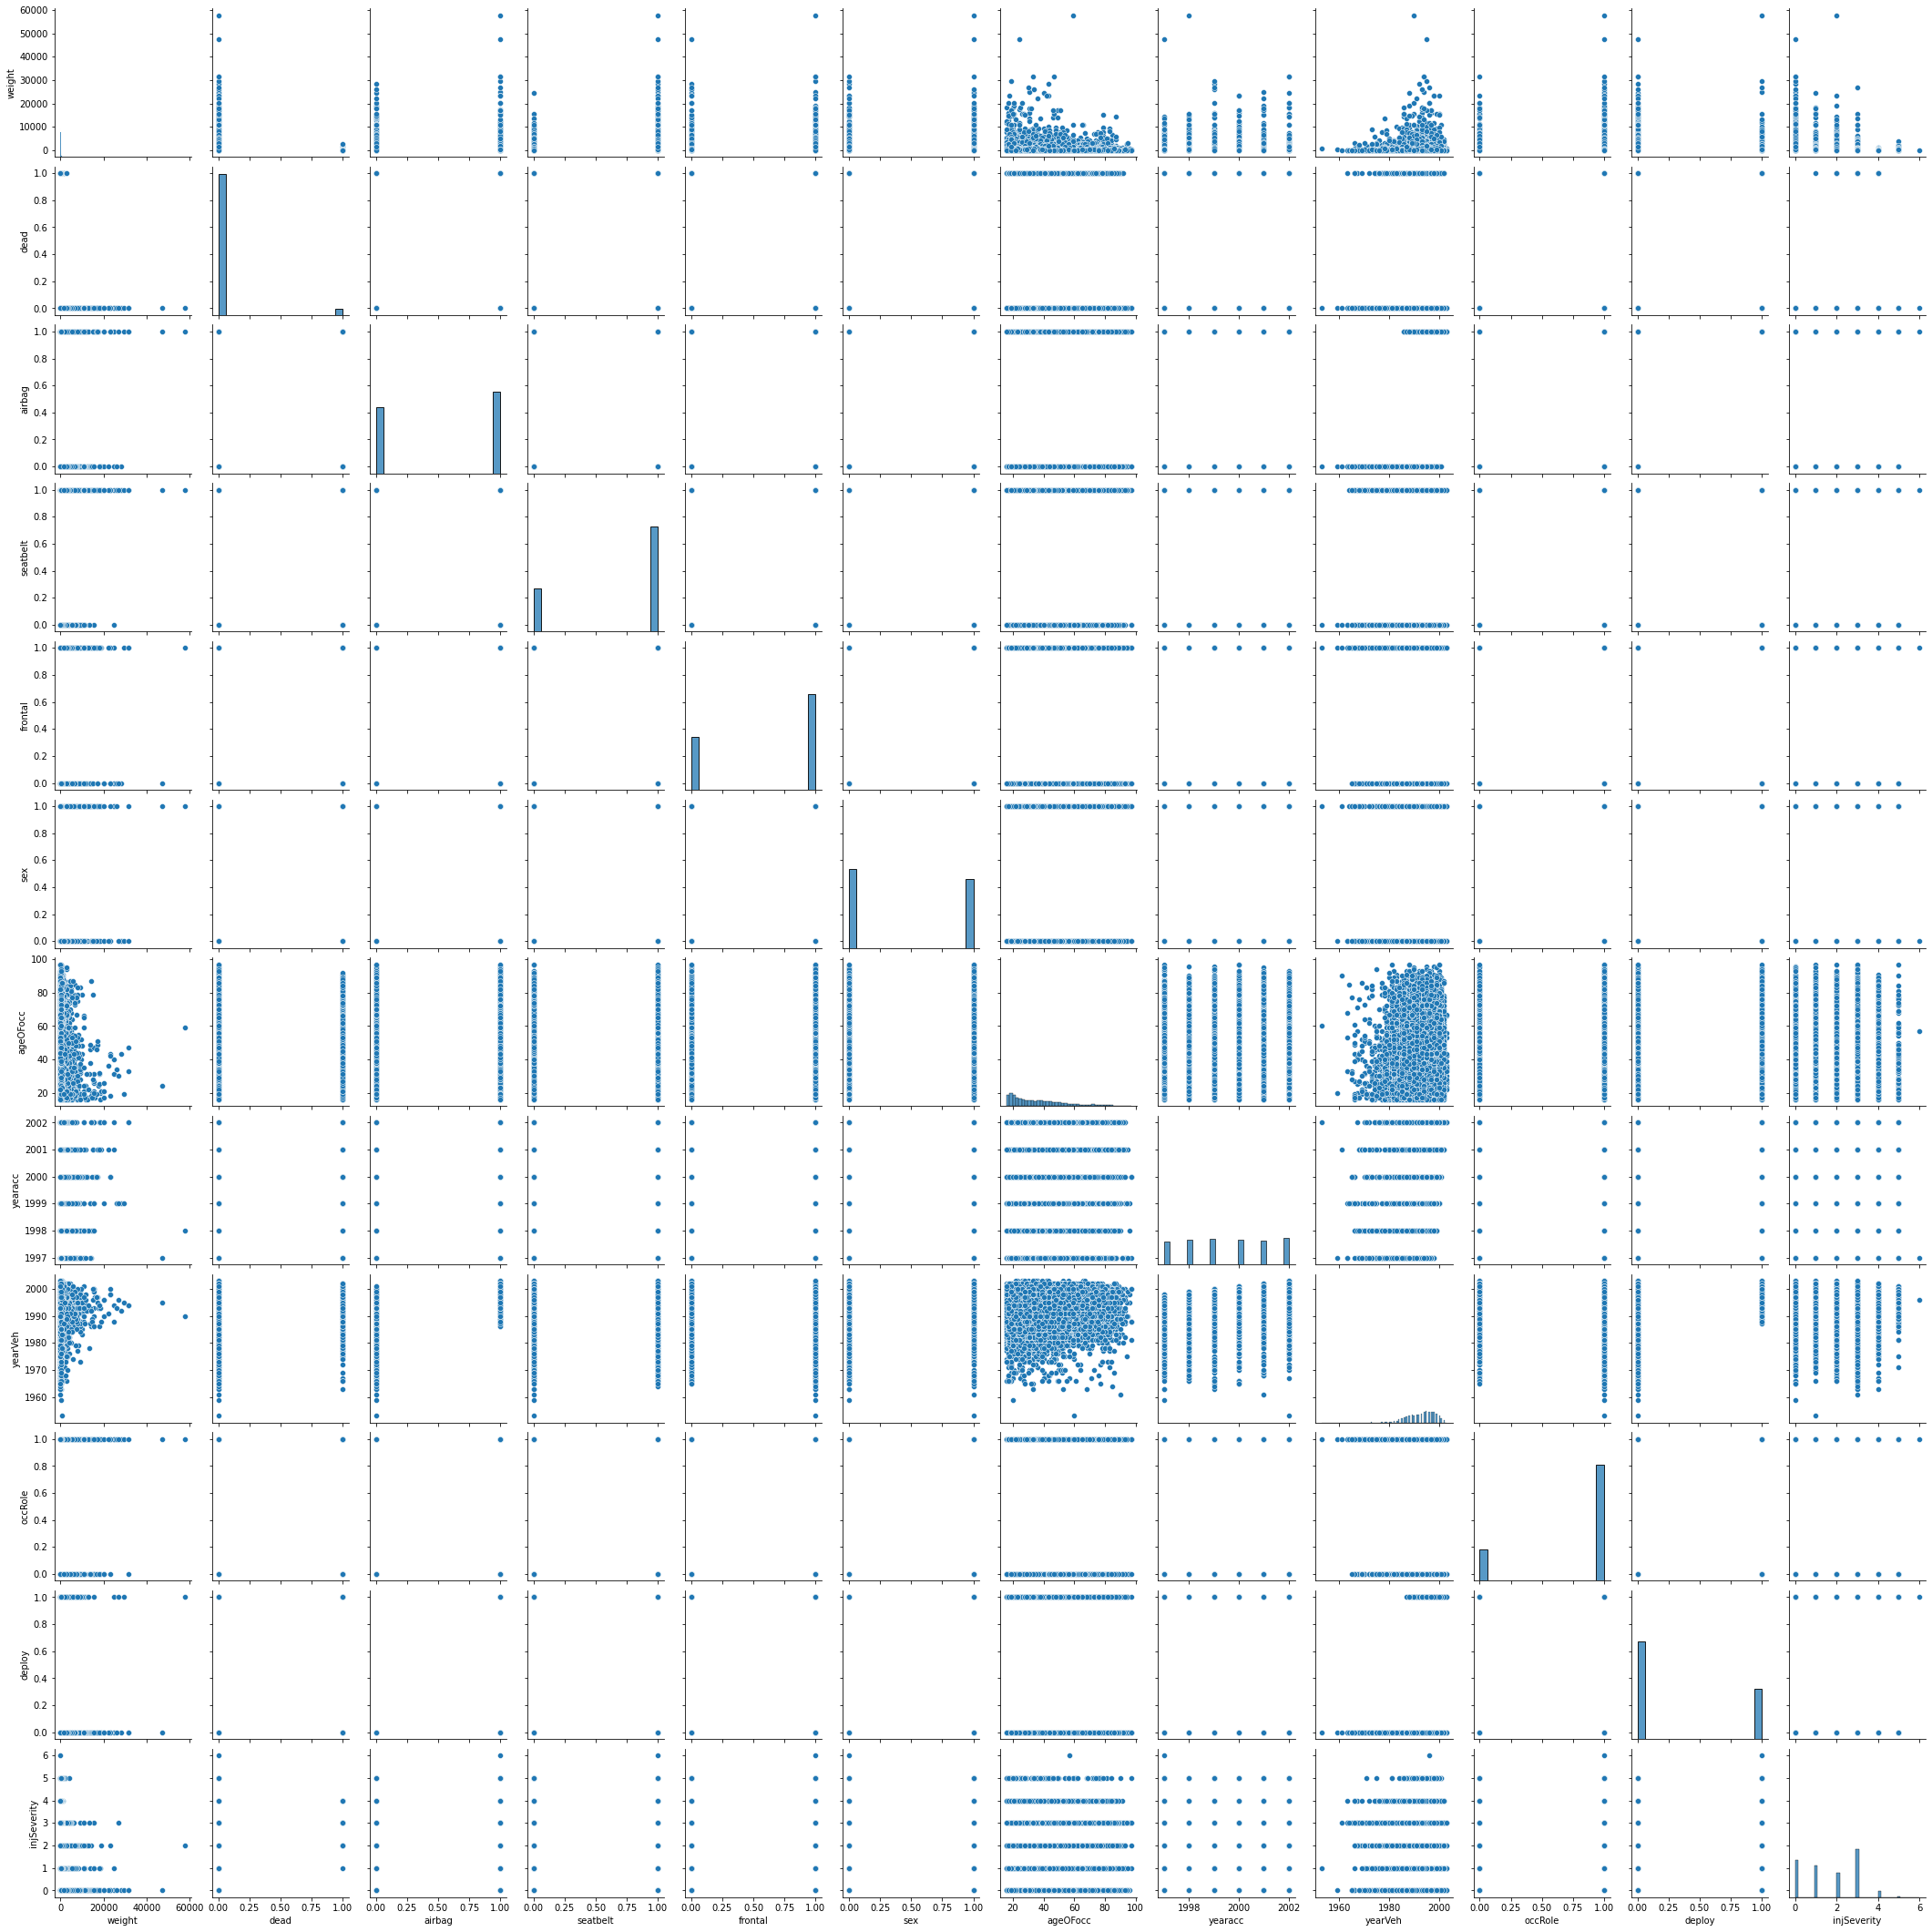

In [ ]:
sns.pairplot(df)
plt.plot()

In [ ]:
## Regressão Logistica

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Entradas e Saídas
X = df[['airbag','seatbelt','frontal','sex','ageOFocc','yearacc','yearVeh','occRole','deploy','injSeverity']]
y = df['dead']

# Separação Treinamento e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1984)

# Definição
clf = LogisticRegression()

# Treinamento
clf.fit(X_train,y_train)

# Avaliação
from sklearn import metrics

y_pred = clf.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print(metrics.accuracy_score(y_test, y_pred))


# Uma forma simples de obter a acuracidade

print(clf.score(X_test,y_test))
# mortos acertados   # mortos errados
# vivos acertados    # acertos vivos

#### Comparação e análise
----------------------------

A partir do emprego da regressão Linear e Logística na base de dados "train-new.csv", possibilitou-se encontrar diferentes constatações quanto às suas diferentes utilizações na classificação binária de dados.
A base de dados utilizada consiste em diversos atributos que, avaliados individualmente, não fornecem uma validação estatística de grande relevância, porém, quando analisados em conjunto a partir de diferentes regressões, é possível gerar um fator resultante que especifique os diferentes parâmetros. 
No caso avaliado, uma variável binária denominada: 'Dead', se define na resultante categórica do exercício, ou seja, todos os outros atributos poderiam ser utilizados para "prever" a possível morte de um indivíduo analisado. 
 
A partir da aplicação da regressão Linear no dataset especificado, observa-se diversos cálculos relevantes para uma melhor interpretação dos dados, dentre eles, o coeficiente R-squared se demonstra de grande valor para o cálculo de "predição" de uma linha reta que se sobreponha aos dados.
Com a Regressão logística, obtém-se o valor de acuracidade da previsão, além de uma matriz de confusão que demonstre a quantidade de vivos/mortos prevista pela IA, assim como os valores de erros calculados, que representam uma estimativa errônea do treinamento utilizado.
 
Dentre as conclusões obtidas na análise do dataset, observa-se uma alta acuracidade por parte da regressão logística ao correlacionar os atributos com a possibilidade de morte/vida de um indivíduo em um veículo.
Uma das observações mais interessantes, o peso das pessoas parece influenciar diretamente em caso de acidentes, dando maior probabilidade de vida a pesos maiores.  